In [46]:
# Run if not on zumi
from PIL import Image
class Zumi(object):
    def __init__(self):
        print("Zumi Initialised")
    
    def forward(self):
        print("Zumi Forward")
        
    def reverse(self):
        print("Zumi Reverse")
        
    def turn_left(self, degree = 90, time = 2):
        print("Zumi Turn Left ", degree, " degrees")
        
    def turn_right(self, degree = 90, time = 2):
        print("Zumi Turn Right ", degree, " degrees")
        
    def get_all_IR_data(self):
        return np.random.randint(1,200, size=(6))
    
    def all_lights_on(self):
        print("Light set on!")

    def all_lights_off(self):
        print("Light set off!")
        
    def get_battery_percent(self):
        return np.random.randint(70,100)
    
class Camera(object):
    def __init__(self):
        print("Camera Initialised")
        
    def capture(self):
        image = Image.open("images/"+random.choice(os.listdir("images")))
        return np.asarray(image)
    
    def clear_output(self):
        a = 1

    
zumi = Zumi()
camera = Camera()

Zumi Initialised
Camera Initialised


In [2]:
from random import randint
import math

In [3]:
def getGlobalPos():
  return (randint(0,255),randint(0,255))

In [4]:
def getStation():
  return (randint(0,255),randint(0,255))

In [26]:
def getOffset(stationPos):
    offset = (-25, 0)
    return tuple(map(sum, zip(stationPos, offset))) 

In [27]:
def getCurrentPos(lastPos):
    drive = (randint(-10,10), randint(-10,10))
    return tuple(map(sum, zip(lastPos, drive))) 

In [28]:
lastPos = getGlobalPos()
currentPos = getCurrentPos(lastPos)
stationPos = getStation()
offsetPos = getOffset(stationPos)

In [33]:
def toCm(pixel):
    cm = pixel/20
    return cm

In [29]:
def turnDegree(lastPos, currentPos, stationPos, zumi):
  a = math.sqrt(pow(lastPos[0]-currentPos[0],2)+pow(lastPos[1]-currentPos[1],2))
  b = math.sqrt(pow(currentPos[0]-stationPos[0],2)+pow(currentPos[1]-stationPos[1],2))
  c = math.sqrt(pow(lastPos[0]-stationPos[0],2)+pow(lastPos[1]-stationPos[1],2))

  beta = math.degrees(math.acos((pow(a,2)+pow(b,2)-pow(c,2))/(2*a*b)))
  beta1 = 180-beta

  turningDirection = (stationPos[0]-lastPos[0])*(currentPos[1]-lastPos[1])-(stationPos[1]-lastPos[1])*(currentPos[0]-lastPos[0]) 
  if(turningDirection < 0):
    zumi.turn_left(beta1,3)
  elif(turningDirection > 0):
    zumi.turn_right(beta1, 3)
  else:
    if(b > c):
      zumi.turn_left(180, 3)
    else:
      #already in right angle to station
      zumi.all_lights_on()
      time.sleep(2)
      zumi.all_lights_off()    

In [30]:
turnDegree(lastPos, currentPos, offsetPos, zumi)

Zumi Turn Right  87.68215035709687  degrees


In [31]:
turnDegree(currentPos, offsetPos, stationPos, zumi)

Zumi Turn Right  75.6186054089094  degrees


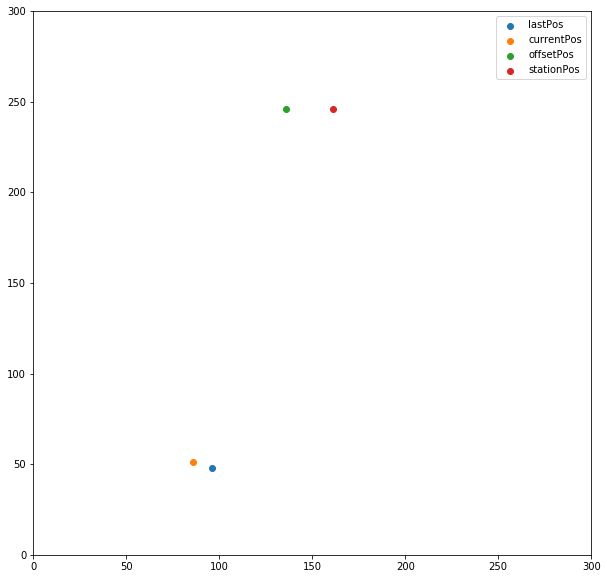

In [32]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
point1 = plt.scatter(lastPos[0], lastPos[1], label="lastPos")
point2 = plt.scatter(currentPos[0], currentPos[1])
point3 = plt.scatter(offsetPos[0], offsetPos[1])
point4 = plt.scatter(stationPos[0], stationPos[1])
plt.legend((point1, point2, point3, point4), ('lastPos', 'currentPos', 'offsetPos', 'stationPos'))
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show()

In [47]:
import time

def park():
    zumi.turn_left(180)
    
    while(isLoading() == false):
        zumi.reverse()
      
    print('loading')
    while(isFull() == false):
        print('.')
        time.sleep(10)

    zumi.forward()
    zumi.forward()
    zumi.turn_left()
    zumi.forward()
    zumi.forward()

In [48]:
def isLoading():
    currentVoltage = zumi.get_battery_voltage()
    
    time.sleep(3)
    if(zumi.get_battery_voltage() != currentVoltage):
        return true
    else:
        return false

In [49]:
def isFull():
    if(zumi.get_battery_percent == 100):
        return true
    else:
        return false